## Input files

We received two files, 13_12-0.csv and 13_12-0-assets_tags.csv. 13_12-0.csv was formatted perfectly (the following data was not placed for all rows there), and 13_12-0-assets_tags.csv contained some inconsistencies, which were not critical, in general (some of the rows were broken, and tags were not separated clearly from the post message).


To calculate over the dataset we used Python environment containing Numpy and Pandas.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()


## Operations with input files:

13_12-0-assets_tags.csv was cleared and both of these files were upload to Pandas. Further actions were performed on 13_12-0.csv only


## Data studying:


In [2]:
df1 = pd.read_csv("13_12-0top5000.csv")

In [3]:
df1.head(5)

,asset_id,followers,engagement,day_of_week,hour_of_day,current_views,current_minute,current_comments,current_reactions,platform,asset_type,has_sponsor,category_number,next_minute,next_reactions,next_comments,next_views
0,19779063,3617754,0.2,4,18,17898,18887,29,2988,instagram,Episode,False,14,23090.0,2992.0,29.0,18086.0
1,19591453,103910,2.0,1,18,0,23208,85,4171,instagram,Image,False,41,28854.0,4171.0,85.0,0.0
2,18959298,315266,7.3,0,18,0,34727,127,29185,instagram,Image,False,7,41825.0,29192.0,127.0,0.0
3,18907487,710855,1.0,0,18,0,34728,17,3457,instagram,Image,False,14,41825.0,3462.0,17.0,0.0
4,19833665,617056,0.1,4,18,1679,18887,3,52,instagram,Episode,False,7,23090.0,52.0,3.0,1679.0


Data received contains 16 columns. For some of them names were changed in comparison with previous discussion (see the list below).
    asset_id, post_id - the post ID
    followers,  - number of followers of the channel
    engagement, - engagement for the channel in the specific sample time
    day_of_week, - Day of week of the publish time of the post
    hour_of_day,  - Hours of the publish time of the post
    current_views, - Current sample views (if asset_type == video)
    current_minute, - Current sample post age (in minutes)
    current_comments, - Current sample comments
    current_reactions, - Current sample reactions
    platform, - Instagram / Facebook / Twitter
    asset_type, - Video / Image
    has_sponsor, - true or false
    category_number, - numeric category of the channel
    next_minute, - The next future post age (in minutes)
    next_reactions, - The next future sample reactions
    next_comments,
    next_views
The data doesn't contain timestamp. Based on this, time series analysis is not a case. We've checked them for ability to calculate regression method to predict "next" variables.
If the customer will provide timestamps (year, month, day, hour, minute), time series would be possible. 


## Features:


These data were obtained mostly from Instagram platform

instagram    9960489

facebook     1206114

twitter       504317
Some other features we described in the attached file value_counts.txt

## Deltas:


We've calculated difference between next and current parameters and called that deltas. 

In [5]:
dfdelta = pd.read_csv("13_12-0deltas.csv")

In [6]:
dfdelta.head(5)

,asset_id,delta_minute,delta_reactions,delta_comments,delta_views
0,19779063,4203.0,4.0,0.0,188.0
1,19591453,5646.0,0.0,0.0,0.0
2,18959298,7098.0,7.0,0.0,0.0
3,18907487,7097.0,5.0,0.0,0.0
4,19833665,4203.0,0.0,0.0,0.0


For deltas, we calculated basic statistical parameters.

In [7]:
dfdelta.describe()

,asset_id,delta_minute,delta_reactions,delta_comments,delta_views
count,8.474077e+06,7.692036e+06,7.692036e+06,7.692036e+06,7.692036e+06
mean,2.046156e+07,3.508483e+03,4.175069e+02,7.076477e+00,2.020391e+03
std,7.613700e+05,2.192732e+03,7.138812e+03,1.926608e+02,3.480977e+04
min,1.959960e+05,0.000000e+00,-4.296010e+05,-3.052200e+04,-7.465160e+05
25%,1.992062e+07,1.438000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.061625e+07,4.273000e+03,5.000000e+00,0.000000e+00,0.000000e+00
75%,2.104681e+07,5.693000e+03,4.400000e+01,1.000000e+00,4.000000e+00
max,2.184877e+07,1.776200e+04,4.368429e+06,1.479740e+05,1.914525e+07


For deltas we've calculated scatter plots to observe dependencies between columns.

Comments and views scatter plot, comments and views as deltas.
Limits: comments > 0, 100000 > views > 0

1000 dots were obtained from dataset in random:

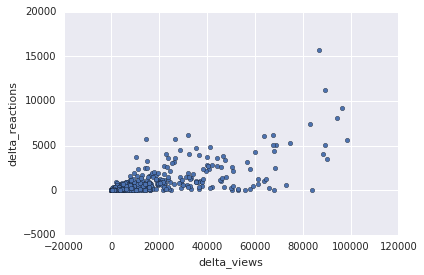

In [10]:
dfdelta_filtered = dfdelta.query('delta_comments>0')
dfdelta_filtered = dfdelta.query('100000>delta_views>0')
dfdelta_filtered[dfdelta_filtered["delta_comments"]>0].head(1000).plot.scatter(x = 'delta_views', y = 'delta_reactions')
plt.show()


100 dots were obtained from dataset in random:

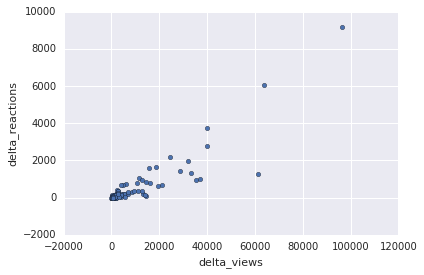

In [11]:
dfdelta_filtered[dfdelta_filtered["delta_comments"]>0].head(100).plot.scatter(x = 'delta_views', y = 'delta_reactions')
plt.show()

Minutes and views scatter plot, minutes and views as deltas.
Minutes are discrete.
Limits: minutes > 0, 100000 > views > 0

1000 dots were obtained from dataset in random:

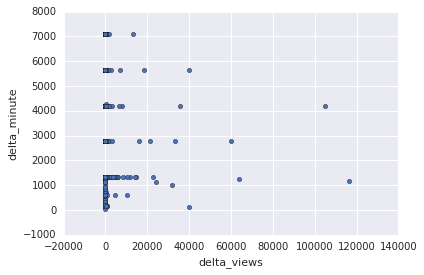

In [15]:
dfdelta_filtered = dfdelta.query('8000>delta_minute>0')
dfdelta_filtered.head(1000).plot.scatter(x = 'delta_views', y = 'delta_minute')
plt.show()

Comments and views scatter plot, comments and views as deltas.
Limits: comments > 0, 100000 > views > 0

1000 dots were obtained from dataset in random:

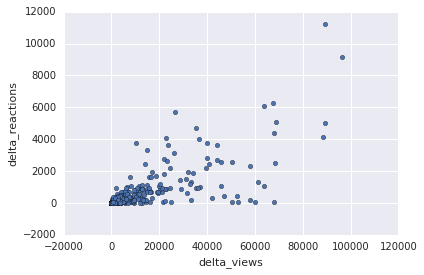

In [17]:
dfdelta_filtered = dfdelta.query('delta_reactions>0')
dfdelta_filtered = dfdelta.query('100000>delta_views>0')
dfdelta_filtered[dfdelta_filtered["delta_reactions"]>0].head(1000).plot.scatter(x = 'delta_views', y = 'delta_reactions')
plt.show()

100 dots were obtained from dataset in random

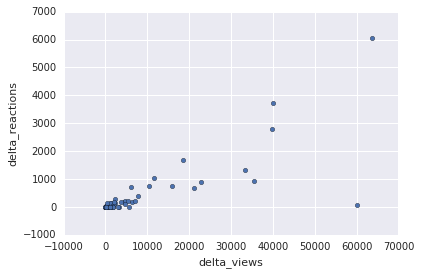

In [18]:
dfdelta_filtered = dfdelta.query('delta_reactions>0')
dfdelta_filtered = dfdelta.query('100000>delta_views>0')
dfdelta_filtered[dfdelta_filtered["delta_reactions"]>0].head(100).plot.scatter(x = 'delta_views', y = 'delta_reactions')
plt.show()

Based on these plots, for the pair views/reactions, some link exists but not intense. At this time the data looks not redundant.

## Data dependencies unravel:


We've built scatter plots for some columns in the main file. 

We've built scatter plots for some columns in the main file. You can find these plots in folder plots/mainfile of the archive. It looks like hour 18 of the day has the great impact, and delta views depends on category. Maybe engagement delta and views are dependent, too.

## Conclusion:


That's possible to move further with this data and build prediction model, even without assets the data looks interesting enough. Scatter plots show possible dependencies between data and targets, at least for the next_views target column. We can build statistical model for prediction in approximately 80-90 hours. 

We made inspection, ranking, and scatter plots. Scatter plot shows that there is some relationship between the data available and the data predicted. The predicted accuracy is not very clear, for now it can be assumed that such a prediction can be constructed, and this accuracy will be sufficient. With considerable probability, at least one ‘next’ variable accuracy will be >60% after the additional data grouping. Accuracy could be estimated after building a trial regression, this will take some extra time, about 10 hours. 
